<a href="https://colab.research.google.com/github/nastyabekesheva/labs/blob/master/Math/Physics/physics_labs_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd

# Lab 1

>[Lab 1](#scrollTo=86MdTIYSpHi3)

>>[Data](#scrollTo=k6d2zG5spxKY)

>[Lab 2](#scrollTo=oOrJLR3huLVD)

>>[Data](#scrollTo=tpDOWUVnuOd4)

>>[Graph of dependecy between U and I](#scrollTo=02utVQrYA2IV)

>>[Graph of dependecy between approximized U and I](#scrollTo=I2ZhOk8xA_Hm)

>>[Calculations](#scrollTo=CNV_u4gpEnfq)



## Data

In [390]:
r = 0.02 #
k = 10**10 #Nm^2/Kl^2
phi = np.array([2500, 2500, 2500, 5000, 5000, 5000, 7500, 7500, 7500, 10000, 10000, 10000, 12500, 12500, 12500, 15000, 15000, 15000]) #kV
R = np.array([0.05, 0.048, 0.049, 0.07, 0.068, 0.071, 0.088, 0.089, 0.09, 0.124, 0.125, 0.126, 0.175, 0.176, 0.173, 0.21, 0.209, 0.212]) #cm

In [391]:
data = {
    'r': np.repeat(r, 18),
    'k': np.repeat(k, 18),
    'phi': phi,
    'R': R
}

In [392]:
pd.DataFrame.from_dict(data)

,r,k,phi,R
0,0.02,10000000000,2500,0.050
1,0.02,10000000000,2500,0.048
2,0.02,10000000000,2500,0.049
3,0.02,10000000000,5000,0.070
4,0.02,10000000000,5000,0.068
5,0.02,10000000000,5000,0.071
6,0.02,10000000000,7500,0.088
7,0.02,10000000000,7500,0.089
8,0.02,10000000000,7500,0.090
9,0.02,10000000000,10000,0.124


We need to find:


*   $\langle R\rangle$
*   $q$
*   $E$
*   $R_{theor}$
*   $\Delta r$
*   $\varepsilon_r$



In [393]:
def calculate_R_avrg(data):
  temp = 0
  R_avrg = np.array([])

  for i in range(len(data['R'])):   
    temp += data['R'][i]
    if i % 3 == 0:
      temp /= 3
      R_avrg = np.append(R_avrg, np.repeat(temp, 3))
      temp = 0

  data.update({'<R>': R_avrg})  
  return data


In [394]:
def calculate_q(data):
  data.update({'q':np.subtract(data['k'], np.multiply(data['phi'], data['r']))})
  return data

In [395]:
def calculate_E(data):
  data.update({'E': np.subtract(np.multiply(data['k'], data['q']), np.power(data['r'], 2))})
  return data

In [396]:
def calculate_delta_R(data):
  #data.update({'delta R':np.multiply(np.sqrt(np.sum(np.power(np.subtract(data['R'], np.repeat(np.sum(data['R']) / len(data['R']), len(data['R']))), 2)) / (len(data['R']) * (len(data['R']) - 1))), 100)})
  return np.multiply(np.sqrt(np.sum(np.power(np.subtract(data, np.repeat(np.sum(data) / len(data), len(data))), 2)) / (len(data) * (len(data) - 1))), 100)

In [397]:
def calculate_all_delta_R(data):
  d1 = np.repeat(calculate_delta_R(data['R'][0:3]), 3)
  d2 = np.repeat(calculate_delta_R(data['R'][3:6]), 3)
  d1 = np.concatenate((d1, d2))
  d3 = np.repeat(calculate_delta_R(data['R'][6:9]), 3)
  d1 = np.concatenate((d1, d3))
  d4 = np.repeat(calculate_delta_R(data['R'][9:12]), 3)
  d1 = np.concatenate((d1, d4))
  d5 = np.repeat(calculate_delta_R(data['R'][12:15]), 3)
  d1 = np.concatenate((d1, d5))
  d6 = np.repeat(calculate_delta_R(data['R'][15:18]), 3)
  d1 = np.concatenate((d1, d6))
  data.update({'delta R':d1})
  return data

In [398]:
def calculate_epsilon_R(data):
  data.update({'epsilon R':np.divide(data['delta R'], np.repeat(np.sum(data['R']) / len(data['R']), len(data['R'])))})
  return data

In [399]:
data = calculate_R_avrg(data)
data = calculate_q(data)
data = calculate_E(data)
data = calculate_all_delta_R(data)
calculate_epsilon_R(data)

{'r': array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]),
 'k': array([10000000000, 10000000000, 10000000000, 10000000000, 10000000000,
        10000000000, 10000000000, 10000000000, 10000000000, 10000000000,
        10000000000, 10000000000, 10000000000, 10000000000, 10000000000,
        10000000000, 10000000000, 10000000000]),
 'phi': array([ 2500,  2500,  2500,  5000,  5000,  5000,  7500,  7500,  7500,
        10000, 10000, 10000, 12500, 12500, 12500, 15000, 15000, 15000]),
 'R': array([0.05 , 0.048, 0.049, 0.07 , 0.068, 0.071, 0.088, 0.089, 0.09 ,
        0.124, 0.125, 0.126, 0.175, 0.176, 0.173, 0.21 , 0.209, 0.212]),
 '<R>': array([0.01666667, 0.01666667, 0.01666667, 0.05566667, 0.05566667,
        0.05566667, 0.07566667, 0.07566667, 0.07566667, 0.101     ,
        0.101     , 0.101     , 0.142     , 0.142     , 0.142     ,
        0.18633333, 0.18633333, 0.18633333]),
 'q': array([9.99999995e+09, 9.99999995

# Lab 2

## Data

In [400]:
battery = {
     'U_0' : np.repeat(4.5, 9),
     'I' : np.insert(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.9]), 0, 0),
     'U' : np.insert(np.array([4.3, 3.8, 3.6, 3.5, 2.8, 2.6, 2.25, 1.5]), 0, 4.5)
}
accumulator = {
     'U_0' : np.repeat(13, 21),
     'I' : np.insert(np.array([float(i/10) for i in range(1, 21)]), 0, 0),
     'U' : np.insert(np.array([float(i/100) for i in range(1200,1300) if i%5==0][::-1]), 0, 13)
}
power_supply = {
     'U_0' : np.repeat(12.13, 9),
     'I' : np.insert(np.array([float(i/100) for i in range(1,225) if i%25==0]), 0, 0),
     'U' : np.insert(np.array([12.09, 12.02, 11.9, 11.85, 11.8, 11.77, 11.71, 11.65]), 0, 12.13)
}

In [401]:
len(np.array([float(i/100) for i in range(1200,1300) if i%5==0][::-1]))

20

In [402]:
pd.DataFrame.from_dict(battery)

,U_0,I,U
0,4.5,0.00,4.50
1,4.5,0.10,4.30
2,4.5,0.20,3.80
3,4.5,0.30,3.60
4,4.5,0.40,3.50
5,4.5,0.50,2.80
6,4.5,0.60,2.60
7,4.5,0.75,2.25
8,4.5,0.90,1.50


In [403]:
pd.DataFrame.from_dict(accumulator)

,U_0,I,U
0,13,0.0,13.00
1,13,0.1,12.95
2,13,0.2,12.90
3,13,0.3,12.85
4,13,0.4,12.80
5,13,0.5,12.75
6,13,0.6,12.70
7,13,0.7,12.65
8,13,0.8,12.60
9,13,0.9,12.55


In [404]:
pd.DataFrame.from_dict(power_supply)

,U_0,I,U
0,12.13,0.00,12.13
1,12.13,0.25,12.09
2,12.13,0.50,12.02
3,12.13,0.75,11.90
4,12.13,1.00,11.85
5,12.13,1.25,11.80
6,12.13,1.50,11.77
7,12.13,1.75,11.71
8,12.13,2.00,11.65


We need to find:



*   $R_i$
*   $R_e$
*   $U_i$
*   $U_e$
*   $R_i$ approximated
*   $P_e$
*   $P_i$
*   $I_{kz}$
*   $P_0$
*   $\dfrac{P(R_e)}{P_0}$
*   $\dfrac{P(R_i)}{P_0}$
*   $P$
*   $\dfrac{P}{P_0}$
*   Efficiency
*   $\langle R\rangle$
*   $\Delta_{R_i}$
*   $\varepsilon_{R_i}$






## Graph of dependecy between U and I 

In [405]:
#battery
xnew_b = np.linspace(battery['I'].min(), battery['I'].max(), 200) 
spl_b = make_interp_spline(battery['I'], battery['U'], k=3)
y_smooth_b = spl_b(xnew_b)

#accumulator
xnew_a = np.linspace(accumulator['I'].min(), accumulator['I'].max(), 200) 
spl_a = make_interp_spline(accumulator['I'], accumulator['U'], k=3)
y_smooth_a = spl_a(xnew_a)

#power_supply
xnew_ps = np.linspace(power_supply['I'].min(), power_supply['I'].max(), 200) 
spl_ps = make_interp_spline(power_supply['I'], power_supply['U'], k=3)
y_smooth_ps = spl_ps(xnew_ps)

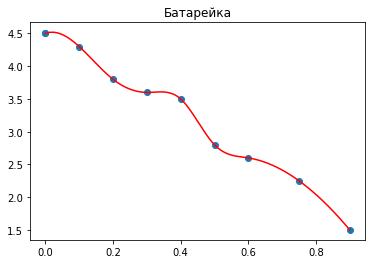

In [406]:
plt.plot(xnew_b, y_smooth_b, 'r')
plt.scatter(np.insert(battery['I'], 0, 0), np.insert(battery['U'], 0, 4.5))
plt.title('Батарейка')
plt.show()

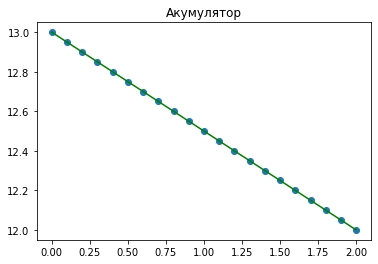

In [407]:
plt.plot(xnew_a, y_smooth_a, 'g')
plt.title('Акумулятор')
plt.scatter(accumulator['I'], accumulator['U'])
plt.show()

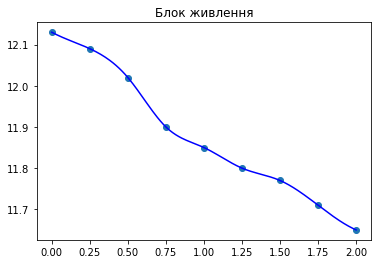

In [408]:
plt.plot(xnew_ps, y_smooth_ps, 'b')
plt.title('Блок живлення')
plt.scatter(power_supply['I'], power_supply['U'])
plt.show()

## Aproximization of data detailed

In [409]:
approx_battery = {
    'U': battery['U'],
    'I': battery['I']
}
approx_accumulator = {
    'U': accumulator['U'],
    'I': accumulator['I']
}
approx_power_supply = {
    'U': power_supply['U'],
    'I': power_supply['I']
}

In [410]:
def calculate_avrg(data, key):
  data.update({f'<{key}>': np.repeat(np.sum(data[key] / len(data[key])), len(data[key]))})
  return data

In [411]:
def calculate_prod(data, key1, key2):
  data.update({f'{key1}{key2}': np.multiply(data[key1], data[key2])})
  return data

In [412]:
def calculate_sq(data, key):
  data.update({f'{key}^2': np.power(data[key], 2)})
  return data

In [413]:
def calculate_k(data):
  data.update({'k': np.divide(np.subtract(data['<IU>'], np.multiply(data['<I>'], data['<U>'])), np.subtract(data['<I^2>'], data['<I>^2']))})
  return data

In [414]:
def calculate_b(data):
  data.update({'b': np.subtract(data['<U>'], np.multiply(data['k'], data['<I>']))})
  return data

In [415]:
def calculate_approx(data):
  data = calculate_avrg(data, 'I')
  data = calculate_avrg(data, 'U')
  data = calculate_sq(data, 'I')
  data = calculate_sq(data, '<I>')
  data = calculate_avrg(data, 'I^2')
  data = calculate_prod(data, 'I', 'U')
  data = calculate_avrg(data, 'IU')
  data = calculate_k(data)
  data = calculate_b(data)

  return data

In [416]:
approx_battery = calculate_approx(approx_battery)
approx_accumulator = calculate_approx(approx_accumulator)
approx_power_supply = calculate_approx(approx_power_supply)

In [417]:
pd.DataFrame.from_dict(approx_battery).round(4)

,U,I,<I>,<U>,I^2,<I>^2,<I^2>,IU,<IU>,k,b
0,4.50,0.00,0.4167,3.2056,0.0000,0.1736,0.2536,0.0000,1.0742,-3.2685,4.5674
1,4.30,0.10,0.4167,3.2056,0.0100,0.1736,0.2536,0.4300,1.0742,-3.2685,4.5674
2,3.80,0.20,0.4167,3.2056,0.0400,0.1736,0.2536,0.7600,1.0742,-3.2685,4.5674
3,3.60,0.30,0.4167,3.2056,0.0900,0.1736,0.2536,1.0800,1.0742,-3.2685,4.5674
4,3.50,0.40,0.4167,3.2056,0.1600,0.1736,0.2536,1.4000,1.0742,-3.2685,4.5674
5,2.80,0.50,0.4167,3.2056,0.2500,0.1736,0.2536,1.4000,1.0742,-3.2685,4.5674
6,2.60,0.60,0.4167,3.2056,0.3600,0.1736,0.2536,1.5600,1.0742,-3.2685,4.5674
7,2.25,0.75,0.4167,3.2056,0.5625,0.1736,0.2536,1.6875,1.0742,-3.2685,4.5674
8,1.50,0.90,0.4167,3.2056,0.8100,0.1736,0.2536,1.3500,1.0742,-3.2685,4.5674


In [418]:
pd.DataFrame.from_dict(approx_accumulator).round(4)

,U,I,<I>,<U>,I^2,<I>^2,<I^2>,IU,<IU>,k,b
0,13.00,0.0,1.0,12.5,0.00,1.0,1.3667,0.000,12.3167,-0.5,13.0
1,12.95,0.1,1.0,12.5,0.01,1.0,1.3667,1.295,12.3167,-0.5,13.0
2,12.90,0.2,1.0,12.5,0.04,1.0,1.3667,2.580,12.3167,-0.5,13.0
3,12.85,0.3,1.0,12.5,0.09,1.0,1.3667,3.855,12.3167,-0.5,13.0
4,12.80,0.4,1.0,12.5,0.16,1.0,1.3667,5.120,12.3167,-0.5,13.0
5,12.75,0.5,1.0,12.5,0.25,1.0,1.3667,6.375,12.3167,-0.5,13.0
6,12.70,0.6,1.0,12.5,0.36,1.0,1.3667,7.620,12.3167,-0.5,13.0
7,12.65,0.7,1.0,12.5,0.49,1.0,1.3667,8.855,12.3167,-0.5,13.0
8,12.60,0.8,1.0,12.5,0.64,1.0,1.3667,10.080,12.3167,-0.5,13.0
9,12.55,0.9,1.0,12.5,0.81,1.0,1.3667,11.295,12.3167,-0.5,13.0


In [419]:
pd.DataFrame.from_dict(approx_power_supply).round(4)

,U,I,<I>,<U>,I^2,<I>^2,<I^2>,IU,<IU>,k,b
0,12.13,0.00,1.0,11.88,0.0000,1.0,1.4167,0.0000,11.7783,-0.244,12.124
1,12.09,0.25,1.0,11.88,0.0625,1.0,1.4167,3.0225,11.7783,-0.244,12.124
2,12.02,0.50,1.0,11.88,0.2500,1.0,1.4167,6.0100,11.7783,-0.244,12.124
3,11.90,0.75,1.0,11.88,0.5625,1.0,1.4167,8.9250,11.7783,-0.244,12.124
4,11.85,1.00,1.0,11.88,1.0000,1.0,1.4167,11.8500,11.7783,-0.244,12.124
5,11.80,1.25,1.0,11.88,1.5625,1.0,1.4167,14.7500,11.7783,-0.244,12.124
6,11.77,1.50,1.0,11.88,2.2500,1.0,1.4167,17.6550,11.7783,-0.244,12.124
7,11.71,1.75,1.0,11.88,3.0625,1.0,1.4167,20.4925,11.7783,-0.244,12.124
8,11.65,2.00,1.0,11.88,4.0000,1.0,1.4167,23.3000,11.7783,-0.244,12.124


## Graph of dependecy between approximized U and I 

Equation of approximation / Linear regration:  
-3.269 x + 4.567


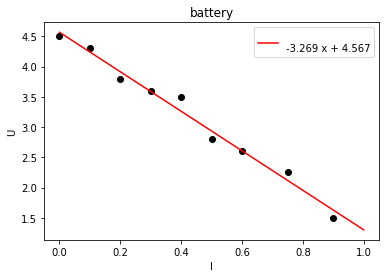

In [420]:
x=battery['I']
y=battery['U']

plt.scatter(x,y,color="black")
plt.title("battery")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,2)
plt.plot(x_s,linear_model_fn(x_s),color="red")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
battery.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

Equation of approximation / Linear regration:  
-0.5 x + 13


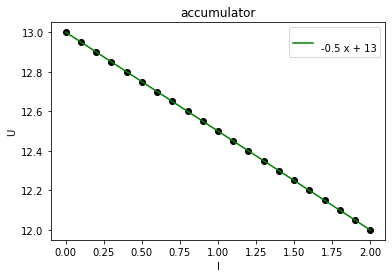

In [421]:
x=accumulator['I']
y=accumulator['U']

plt.scatter(x,y,color="black")
plt.title("accumulator")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,3)
plt.plot(x_s,linear_model_fn(x_s),color="green")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
accumulator.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

Equation of approximation / Linear regration:  
-0.244 x + 12.12


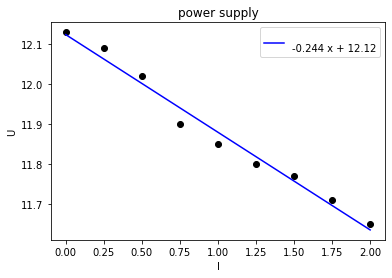

In [422]:
x=power_supply['I']
y=power_supply['U']

plt.scatter(x,y,color="black")
plt.title("power supply")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,3)
plt.plot(x_s,linear_model_fn(x_s),color="blue")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
power_supply.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

## Calculations

In [423]:
for i in battery:
  battery[i] = battery[i][1:]

In [424]:
for i in accumulator:
  accumulator[i] = accumulator[i][1:]

In [425]:
for i in power_supply:
  power_supply[i] = power_supply[i][1:]

In [426]:
def calculate_R_i(data):
  #data.update({'R_i':np.divide(np.subtract(data['U_0'], data['I']), data['U'])})
  data.update({'R_i':np.divide(np.subtract(data['U_0'], data['U']), data['I'])})
  return data

In [427]:
def calculate_R_e(data):
  data.update({'R_e':np.absolute((np.divide(data['U'], data['I'])))})
  return data

In [428]:
#def calculate_R_approx(data): added while building graphs

In [429]:
def calculate_U_i(data):
  data.update({'U_i':np.absolute(np.multiply(data['I'], data['R_i(approx)']))})
  return data

In [430]:
def calculate_U_e(data):
  data.update({'U_e':np.absolute(np.subtract(data['U_0'], data['U_i']))})
  return data

In [431]:
def calculate_P_e(data):
  data.update({'P_e':np.absolute(np.multiply(np.multiply(data['I'], data['I']), data['R_e']))})
  return data

In [432]:
def calculate_P_i(data):
  data.update({'P_i':np.absolute(np.multiply(np.multiply(data['I'], data['I']), data['R_i(approx)']))})
  return data

In [433]:
def calculate_I_kz(data):
  data.update({'I_kz':np.absolute(np.divide(data['U_0'], data['R_i(approx)']))})
  return data

In [434]:
def calculate_P_0(data):
  data.update({'P_0':np.absolute(np.multiply(data['U_0'], data['I_kz']))})
  return data

In [435]:
def calculate_div_Pe0(data):
  data.update({'P_e/P_0':np.absolute(np.divide(data['P_e'], data['P_0']))})
  return data

In [436]:
def calculate_div_Pi0(data):
  data.update({'P_i/P_0':np.absolute(np.divide(data['P_i'], data['P_0']))})
  return data

In [437]:
def calculate_P(data):
  data.update({'P':np.absolute(np.add(data['P_i'], data['P_e']))})
  return data

In [438]:
def calculate_div_PP0(data):
  data.update({'P/P_0':np.absolute(np.divide(data['P'], data['P_0']))})
  return data

In [439]:
def calculate_efficiency(data):
  data.update({'Efficiency':np.absolute(np.multiply(data['P_e/P_0'], 100))})
  return data

In [440]:
def calculate_R_abs(data):
  data.update({'{R}':np.absolute(np.divide(np.repeat(np.sum(data['R_i']), len(data['R_i'])), len(data['R_i'])))})
  return data

In [441]:
def calculate_delta_R(data):
  #R_avrg = np.sum(data['R_i']) / len(data['R_i'])
  #s = np.sqrt(np.sum(np.power(np.subtract(data['R_i'], np.repeat(R_avrg, len(data['R_i']))), 2)) / (len(data['R_i']) * (len(data['R_i']) - 1)))
  data.update({'delta R':np.multiply(np.sqrt(np.sum(np.power(np.subtract(data['R_i'], np.repeat(np.sum(data['R_i']) / len(data['R_i']), len(data['R_i']))), 2)) / (len(data['R_i']) * (len(data['R_i']) - 1))), 100)})
  return data

In [442]:
def calculate_epsilon_R(data):
  #data.update({'epsilon R':np.multiply(np.repeat(data['delta R'] / np.sum(data['R_i']) / len(data['R_i']), len(data['R_i'])), 100)})
  data.update({'epsilon R':np.divide(data['delta R'], np.repeat(np.sum(data['R_i']) / len(data['R_i']), len(data['R_i'])))})
  return data

In [443]:
def calculate_all(data):
  data = calculate_R_i(data)
  data = calculate_R_e(data)
  data = calculate_U_i(data)
  data = calculate_U_e(data)
  data = calculate_P_e(data)
  data = calculate_P_i(data)
  data = calculate_I_kz(data)
  data = calculate_P_0(data)
  data = calculate_div_Pe0(data)
  data = calculate_div_Pi0(data)
  data = calculate_P(data)
  data = calculate_div_PP0(data)
  data = calculate_efficiency(data)
  data = calculate_R_abs(data)
  data = calculate_delta_R(data)
  data = calculate_epsilon_R(data)

  return data

In [444]:
battery = calculate_all(battery)
accumulator = calculate_all(accumulator)
power_supply = calculate_all(power_supply)

## Display data

In [445]:
df_battery = pd.DataFrame.from_dict(battery)
df_battery = df_battery.round(2)
df_battery

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},delta R,epsilon R
0,4.5,0.10,4.30,3.27,2.00,43.00,0.33,4.17,0.43,0.03,1.38,6.2,0.07,0.01,0.46,0.07,6.94,2.99,17.92,6.0
1,4.5,0.20,3.80,3.27,3.50,19.00,0.65,3.85,0.76,0.13,1.38,6.2,0.12,0.02,0.89,0.14,12.27,2.99,17.92,6.0
2,4.5,0.30,3.60,3.27,3.00,12.00,0.98,3.52,1.08,0.29,1.38,6.2,0.17,0.05,1.37,0.22,17.43,2.99,17.92,6.0
3,4.5,0.40,3.50,3.27,2.50,8.75,1.31,3.19,1.40,0.52,1.38,6.2,0.23,0.08,1.92,0.31,22.60,2.99,17.92,6.0
4,4.5,0.50,2.80,3.27,3.40,5.60,1.63,2.87,1.40,0.82,1.38,6.2,0.23,0.13,2.22,0.36,22.60,2.99,17.92,6.0
5,4.5,0.60,2.60,3.27,3.17,4.33,1.96,2.54,1.56,1.18,1.38,6.2,0.25,0.19,2.74,0.44,25.18,2.99,17.92,6.0
6,4.5,0.75,2.25,3.27,3.00,3.00,2.45,2.05,1.69,1.84,1.38,6.2,0.27,0.30,3.53,0.57,27.24,2.99,17.92,6.0
7,4.5,0.90,1.50,3.27,3.33,1.67,2.94,1.56,1.35,2.65,1.38,6.2,0.22,0.43,4.00,0.65,21.79,2.99,17.92,6.0


In [446]:
df_accumulator = pd.DataFrame.from_dict(accumulator)
df_accumulator = df_accumulator.round(2)
df_accumulator

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},delta R,epsilon R
0,13,0.1,12.95,0.5,0.5,129.50,0.05,12.95,1.30,0.00,26.0,338.0,0.00,0.00,1.3,0.00,0.38,0.5,0.0,0.0
1,13,0.2,12.90,0.5,0.5,64.50,0.10,12.90,2.58,0.02,26.0,338.0,0.01,0.00,2.6,0.01,0.76,0.5,0.0,0.0
2,13,0.3,12.85,0.5,0.5,42.83,0.15,12.85,3.86,0.04,26.0,338.0,0.01,0.00,3.9,0.01,1.14,0.5,0.0,0.0
3,13,0.4,12.80,0.5,0.5,32.00,0.20,12.80,5.12,0.08,26.0,338.0,0.02,0.00,5.2,0.02,1.51,0.5,0.0,0.0
4,13,0.5,12.75,0.5,0.5,25.50,0.25,12.75,6.38,0.12,26.0,338.0,0.02,0.00,6.5,0.02,1.89,0.5,0.0,0.0
5,13,0.6,12.70,0.5,0.5,21.17,0.30,12.70,7.62,0.18,26.0,338.0,0.02,0.00,7.8,0.02,2.25,0.5,0.0,0.0
6,13,0.7,12.65,0.5,0.5,18.07,0.35,12.65,8.86,0.24,26.0,338.0,0.03,0.00,9.1,0.03,2.62,0.5,0.0,0.0
7,13,0.8,12.60,0.5,0.5,15.75,0.40,12.60,10.08,0.32,26.0,338.0,0.03,0.00,10.4,0.03,2.98,0.5,0.0,0.0
8,13,0.9,12.55,0.5,0.5,13.94,0.45,12.55,11.30,0.40,26.0,338.0,0.03,0.00,11.7,0.03,3.34,0.5,0.0,0.0
9,13,1.0,12.50,0.5,0.5,12.50,0.50,12.50,12.50,0.50,26.0,338.0,0.04,0.00,13.0,0.04,3.70,0.5,0.0,0.0


In [447]:
df_power_supply = pd.DataFrame.from_dict(power_supply)
df_power_supply = df_power_supply.round(2)
df_power_supply

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},delta R,epsilon R
0,12.13,0.25,12.09,0.24,0.16,48.36,0.06,12.07,3.02,0.02,49.71,603.02,0.01,0.0,3.04,0.01,0.50,0.24,1.54,6.32
1,12.13,0.50,12.02,0.24,0.22,24.04,0.12,12.01,6.01,0.06,49.71,603.02,0.01,0.0,6.07,0.01,1.00,0.24,1.54,6.32
2,12.13,0.75,11.90,0.24,0.31,15.87,0.18,11.95,8.93,0.14,49.71,603.02,0.01,0.0,9.06,0.02,1.48,0.24,1.54,6.32
3,12.13,1.00,11.85,0.24,0.28,11.85,0.24,11.89,11.85,0.24,49.71,603.02,0.02,0.0,12.09,0.02,1.97,0.24,1.54,6.32
4,12.13,1.25,11.80,0.24,0.26,9.44,0.30,11.83,14.75,0.38,49.71,603.02,0.02,0.0,15.13,0.03,2.45,0.24,1.54,6.32
5,12.13,1.50,11.77,0.24,0.24,7.85,0.37,11.76,17.66,0.55,49.71,603.02,0.03,0.0,18.20,0.03,2.93,0.24,1.54,6.32
6,12.13,1.75,11.71,0.24,0.24,6.69,0.43,11.70,20.49,0.75,49.71,603.02,0.03,0.0,21.24,0.04,3.40,0.24,1.54,6.32
7,12.13,2.00,11.65,0.24,0.24,5.82,0.49,11.64,23.30,0.98,49.71,603.02,0.04,0.0,24.28,0.04,3.86,0.24,1.54,6.32


## Some more graphs

In [448]:
data_battery = {
    'R_e/R_i' : np.absolute(np.divide(battery['R_e'], battery['R_i']))[:-1][::-1],
    'U_e/U' : np.absolute(np.divide(battery['U'], battery['U_0']))[:-1][::-1],
    'I/I_kz' : np.absolute(np.divide(battery['I'], battery['I_kz']))[:-1][::-1],
    'P/P_0' : battery['P/P_0'][:-1][::-1]
}
data_accumulator = {
    'R_e/R_i' : np.absolute(np.divide(accumulator['R_e'], accumulator['R_i']))[::-1],
    'U_e/U' : np.absolute(np.divide(accumulator['U'], accumulator['U_0']))[::-1],
    'I/I_kz' : np.absolute(np.divide(accumulator['I'], accumulator['I_kz']))[::-1],
    'P/P_0' : accumulator['P/P_0'][::-1]
}
data_power_supply = {
    'R_e/R_i' : np.absolute(np.divide(power_supply['R_e'], power_supply['R_i']))[::-1],
    'U_e/U' : np.absolute(np.divide(power_supply['U'], power_supply['U_0']))[::-1],
    'I/I_kz' : np.absolute(np.divide(power_supply['I'], power_supply['I_kz']))[::-1],
    'P/P_0' : power_supply['P/P_0'][::-1]
}

In [449]:
#battery
xnew_db = np.linspace(data_battery['R_e/R_i'].min(), data_battery['R_e/R_i'].max(), 200) 
spl_db1 = make_interp_spline(data_battery['R_e/R_i'], data_battery['U_e/U'], k=3)
y_smooth_db1 = spl_db1(xnew_db)
spl_db2 = make_interp_spline(data_battery['R_e/R_i'], data_battery['I/I_kz'], k=3)
y_smooth_db2 = spl_db2(xnew_db)
spl_db3 = make_interp_spline(data_battery['R_e/R_i'], data_battery['P/P_0'], k=3)
y_smooth_db3 = spl_db3(xnew_db)

#accumulator
xnew_da = np.linspace(data_accumulator['R_e/R_i'].min(), data_accumulator['R_e/R_i'].max(), 200) 
spl_da1 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['U_e/U'], k=3)
y_smooth_da1 = spl_da1(xnew_da)
spl_da2 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['I/I_kz'], k=3)
y_smooth_da2 = spl_da2(xnew_da)
spl_da3 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['P/P_0'], k=3)
y_smooth_da3 = spl_da3(xnew_da)

#power_supply
xnew_dps = np.linspace(data_power_supply['R_e/R_i'].min(), data_power_supply['R_e/R_i'].max(), 200) 
spl_dps1 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['U_e/U'], k=3)
y_smooth_dps1 = spl_dps1(xnew_dps)
spl_dps2 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['I/I_kz'], k=3)
y_smooth_dps2 = spl_dps2(xnew_dps)
spl_dps3 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['P/P_0'], k=3)
y_smooth_dps3 = spl_dps3(xnew_dps)

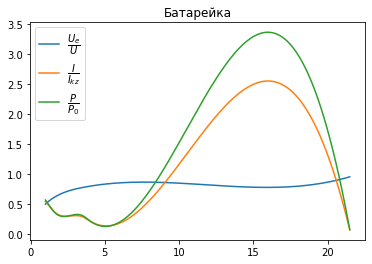

In [450]:
plt.plot(xnew_db, y_smooth_db1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_db, y_smooth_db2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_db, y_smooth_db3, label=r'$\dfrac{P}{P_0}$')
plt.title('Батарейка')
plt.legend()
plt.show()

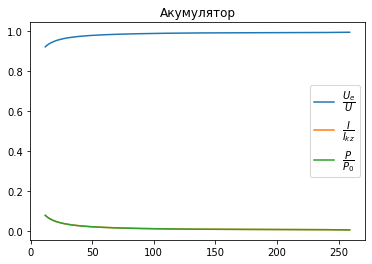

In [451]:
plt.plot(xnew_da, y_smooth_da1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_da, y_smooth_da2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_da, y_smooth_da3, label=r'$\dfrac{P}{P_0}$')
plt.title('Акумулятор')
plt.legend()
plt.show()

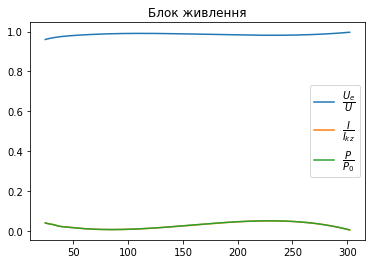

In [452]:
plt.plot(xnew_dps, y_smooth_dps1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_dps, y_smooth_dps2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_dps, y_smooth_dps3, label=r'$\dfrac{P}{P_0}$')
plt.title('Блок живлення')
plt.legend()
plt.show()

## And some more graphs

In [453]:
data_battery = {
    'I/I_kz' : np.absolute(np.divide(battery['I'], battery['I_kz'])),
    'P_e/P_0' : battery['P_e/P_0'],
    'P_i/P_0' : battery['P_i/P_0'],
    'P/P_0' : battery['P/P_0']
}
data_accumulator = {
    'I/I_kz' : np.absolute(np.divide(accumulator['I'], accumulator['I_kz'])),
    'P_e/P_0' : accumulator['P_e/P_0'],
    'P_i/P_0' : accumulator['P_i/P_0'],
    'P/P_0' : accumulator['P/P_0']
}
data_power_supply = {
    'I/I_kz' : np.absolute(np.divide(power_supply['I'], power_supply['I_kz'])),
    'P_e/P_0' : power_supply['P_e/P_0'],
    'P_i/P_0' : power_supply['P_i/P_0'],
    'P/P_0' : power_supply['P/P_0']
}

In [454]:
#battery
xnew_db = np.linspace(data_battery['I/I_kz'].min(), data_battery['I/I_kz'].max(), 200) 
spl_db1 = make_interp_spline(data_battery['I/I_kz'], data_battery['P_e/P_0'], k=3)
y_smooth_db1 = spl_db1(xnew_db)
spl_db2 = make_interp_spline(data_battery['I/I_kz'], data_battery['P_i/P_0'], k=3)
y_smooth_db2 = spl_db2(xnew_db)
spl_db3 = make_interp_spline(data_battery['I/I_kz'], data_battery['P/P_0'], k=3)
y_smooth_db3 = spl_db3(xnew_db)

#accumulator
xnew_da = np.linspace(data_accumulator['I/I_kz'].min(), data_accumulator['I/I_kz'].max(), 200) 
spl_da1 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P_e/P_0'], k=3)
y_smooth_da1 = spl_da1(xnew_da)
spl_da2 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P_i/P_0'], k=3)
y_smooth_da2 = spl_da2(xnew_da)
spl_da3 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P/P_0'], k=3)
y_smooth_da3 = spl_da3(xnew_da)

#power_supply
xnew_dps = np.linspace(data_power_supply['I/I_kz'].min(), data_power_supply['I/I_kz'].max(), 200) 
spl_dps1 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P_e/P_0'], k=3)
y_smooth_dps1 = spl_dps1(xnew_dps)
spl_dps2 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P_i/P_0'], k=3)
y_smooth_dps2 = spl_dps2(xnew_dps)
spl_dps3 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P/P_0'], k=3)
y_smooth_dps3 = spl_dps3(xnew_dps)

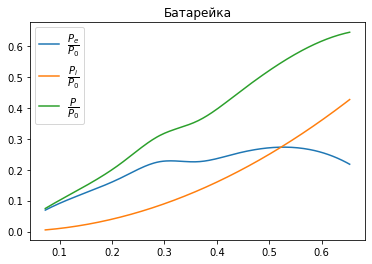

In [455]:
plt.plot(xnew_db, y_smooth_db1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_db, y_smooth_db2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_db, y_smooth_db3, label=r'$\dfrac{P}{P_0}$')
plt.title('Батарейка')
plt.legend()
plt.show()

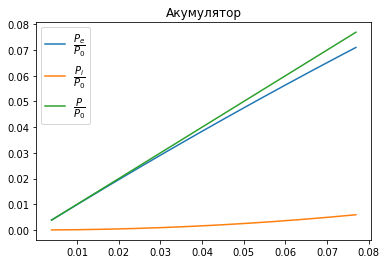

In [456]:
plt.plot(xnew_da, y_smooth_da1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_da, y_smooth_da2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_da, y_smooth_da3, label=r'$\dfrac{P}{P_0}$')
plt.title('Акумулятор')
plt.legend()
plt.show()

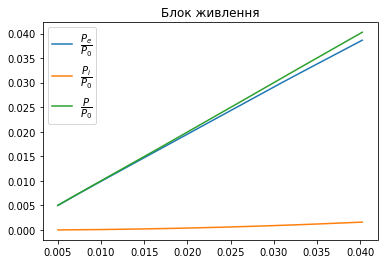

In [457]:
plt.plot(xnew_dps, y_smooth_dps1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_dps, y_smooth_dps2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_dps, y_smooth_dps3, label=r'$\dfrac{P}{P_0}$')
plt.title('Блок живлення')
plt.legend()
plt.show()